# Instructions


The assignment is at the bottom!

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [247]:
!pip install seaborn

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("/Users/emily/OneDrive/Documents/GitHub/mlnn/data/bikeshare_hour_count.csv")
day_hour_count

,hour_of_day,0,1,2,3,4,5,6
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


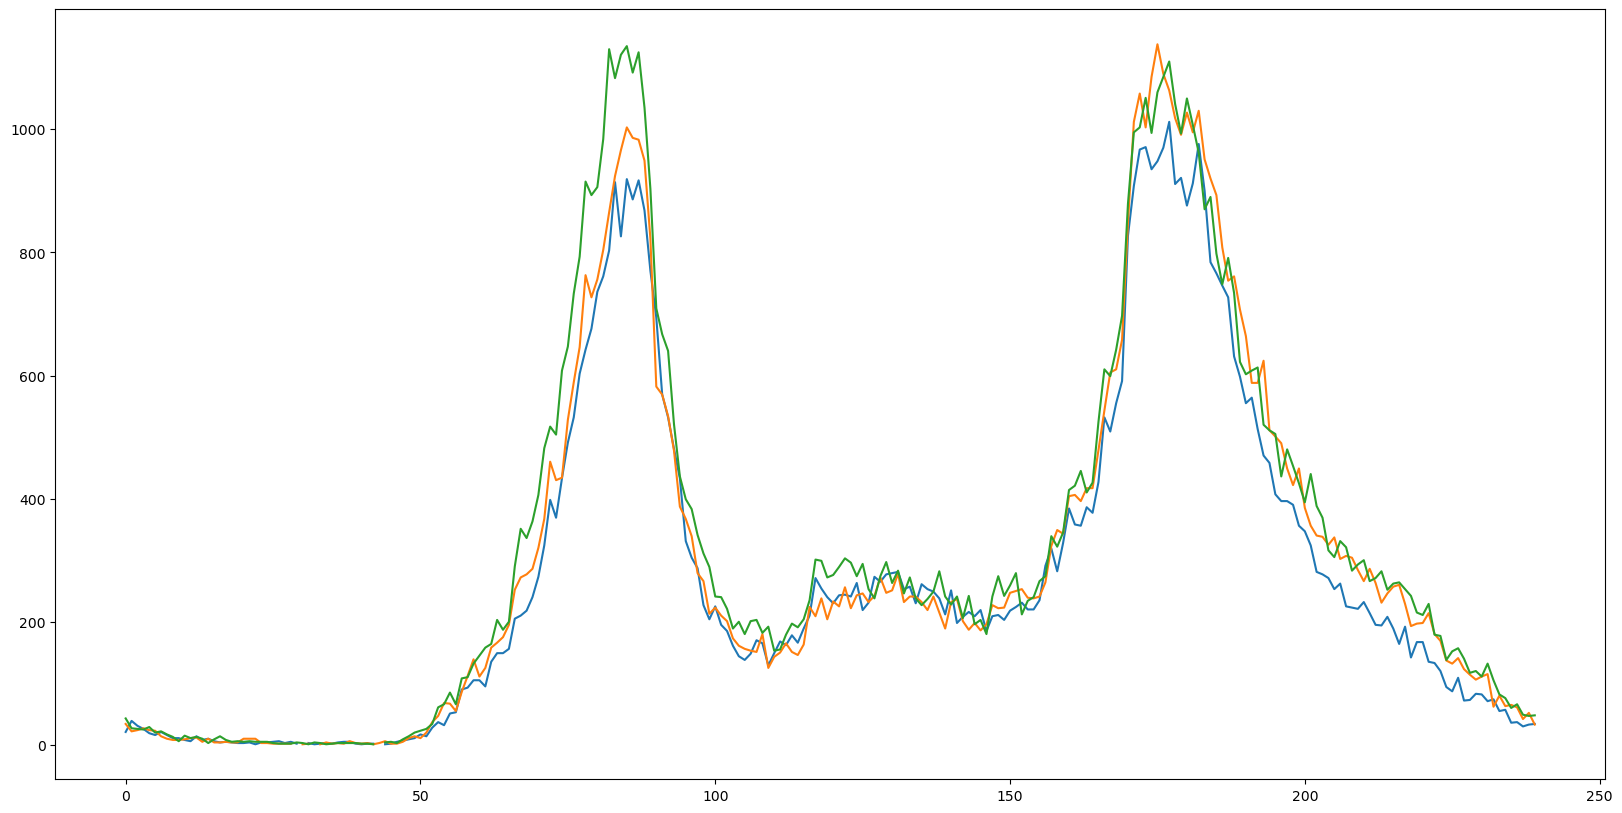

In [249]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["0"])
plt.plot(day_hour_count.index, day_hour_count["1"])
plt.plot(day_hour_count.index, day_hour_count["2"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create two dataframes `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)

In [250]:
monday = day_hour_count[["hour_of_day", "0"]].copy()
monday

,hour_of_day,0
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [251]:
saturday = day_hour_count[["hour_of_day", "5"]].copy()
saturday

,hour_of_day,5
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0



## 2a. Create 3 models fit to `monday.hour_of_day` with varying polynomial degrees ( choose from `n=5,10,15`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

In [252]:
monday[monday['0'].isna()]

,hour_of_day,0
30,3.0,NaN
43,4.3,NaN


In [253]:
monday[['0']] = monday[['0']].fillna(0)

In [254]:
monday[['0']].isna().sum()

0    0
dtype: int64

In [255]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
x = monday[["hour_of_day"]]
my = monday[['0']]

# polynomial n=5
x_5 = PolynomialFeatures(degree=5).fit_transform(x.values)
# polynomial n=10
x_10 = PolynomialFeatures(degree=10).fit_transform(x.values)
# polynomial n=15
x_15 = PolynomialFeatures(degree=15).fit_transform(x.values)

# fit the models
mon_5 = linear.fit(x_5, my).predict(x_5)
mon_10 = linear.fit(x_10, my).predict(x_10)
mon_15 = linear.fit(x_15, my).predict(x_15)

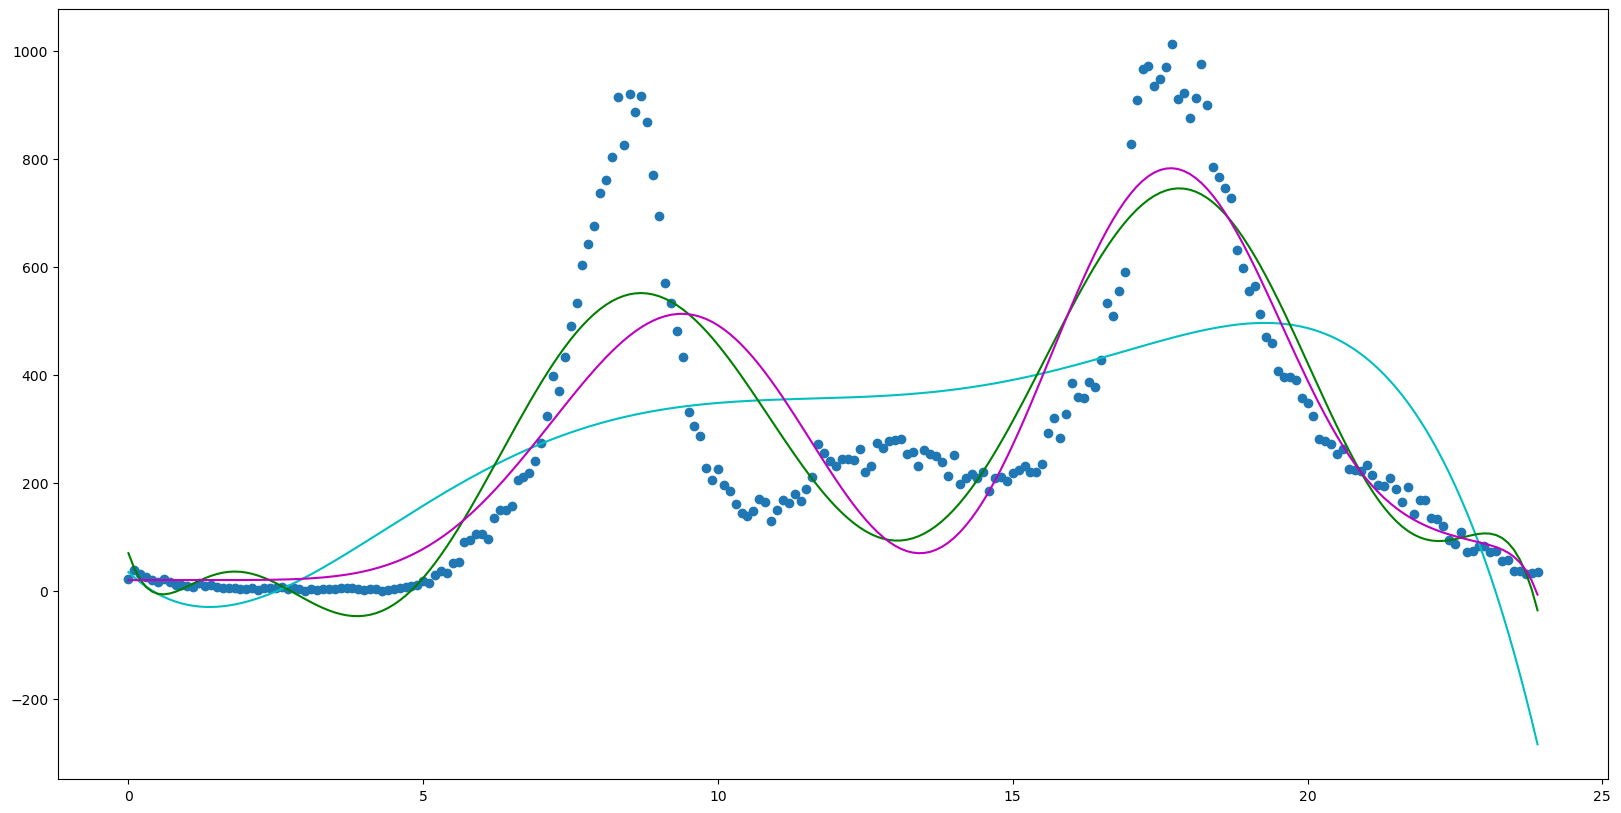

In [256]:
plt.scatter(x, my)
plt.plot(x, mon_5, c = 'c')
plt.plot(x, mon_10, c = 'g')
plt.plot(x, mon_15, c = 'm')

## 2b. Repeat `2a` for `saturday.hour_of_day`

In [257]:
saturday[['5']] = saturday[['5']].fillna(0)

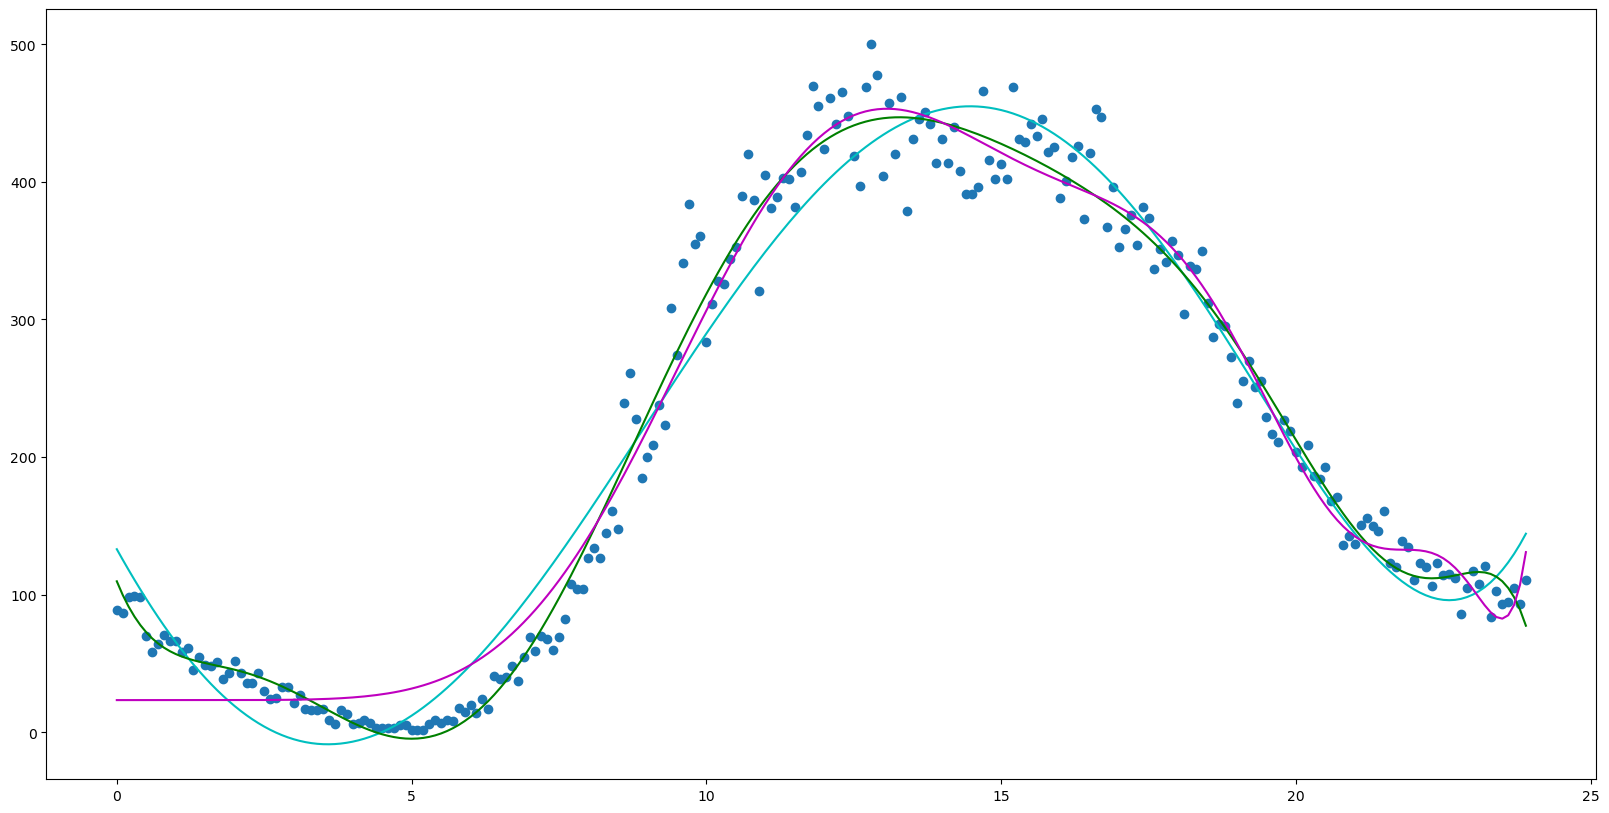

In [258]:
sy = saturday[['5']]
sat_5 = linear.fit(x_5, sy).predict(x_5)
sat_10 = linear.fit(x_10, sy).predict(x_10)
sat_15 = linear.fit(x_15, sy).predict(x_15)
plt.scatter(x, sy)
plt.plot(x, sat_5, c = 'c')
plt.plot(x, sat_10, c = 'g')
plt.plot(x, sat_15, c = 'm')

## 3. Using the n=15 polynomial, create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values using the `monday` and `saturday` datasets.


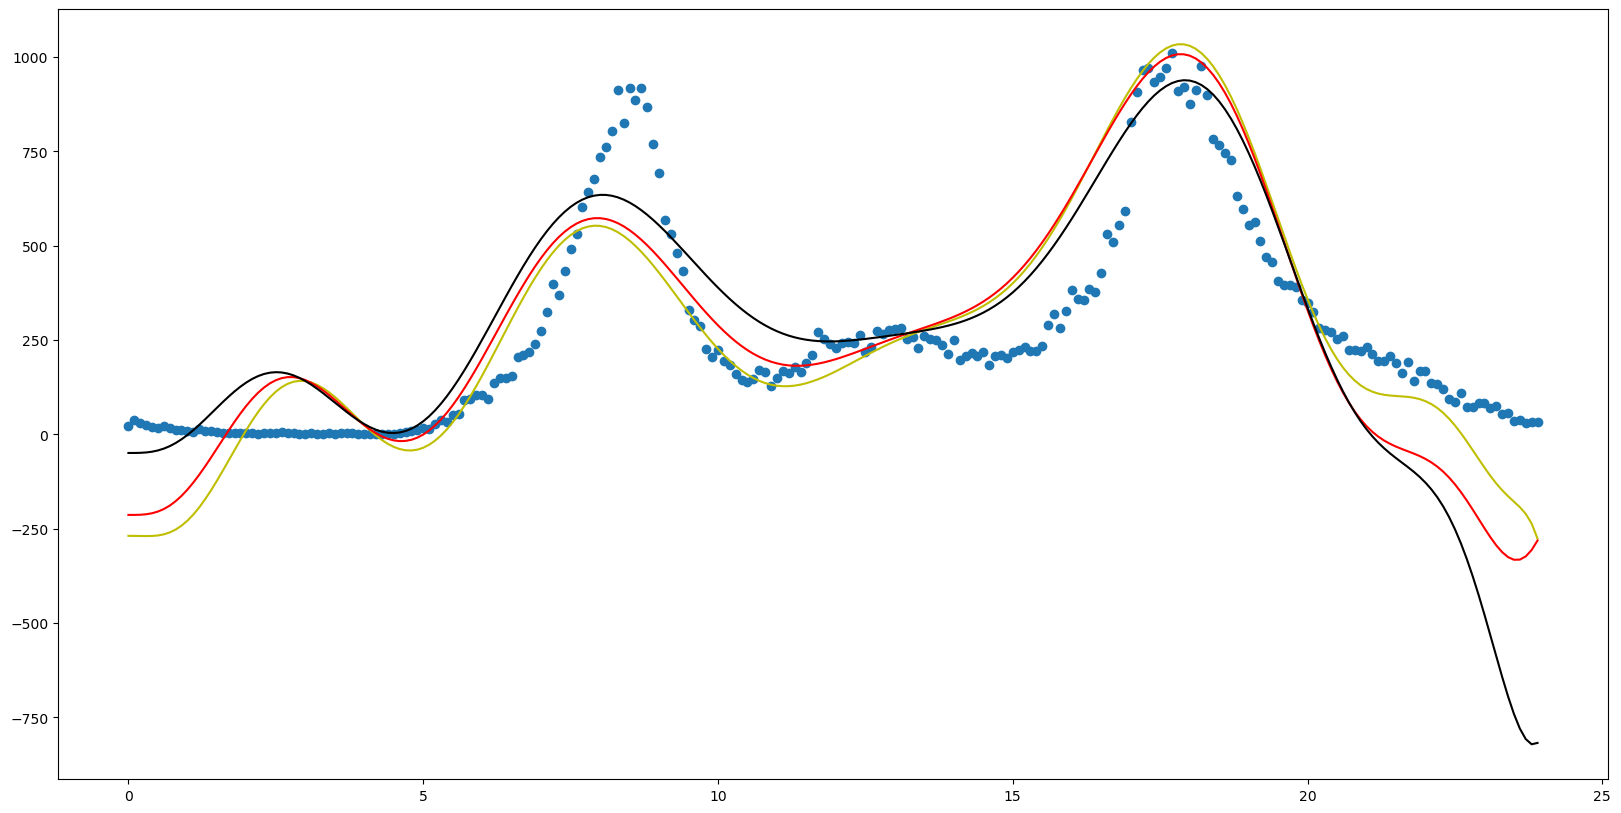

In [259]:
#Monday
mon_ridge_1 = linear_model.Ridge(alpha=1).fit(x_15, my).predict(x_15)
mon_ridge_10 = linear_model.Ridge(alpha=10).fit(x_15, my).predict(x_15)
mon_ridge_25 = linear_model.Ridge(alpha=25).fit(x_15, my).predict(x_15)
plt.scatter(x, my)
plt.plot(x, mon_ridge_1, c = 'y')
plt.plot(x, mon_ridge_10, c = 'r')
plt.plot(x, mon_ridge_25, c = 'k')

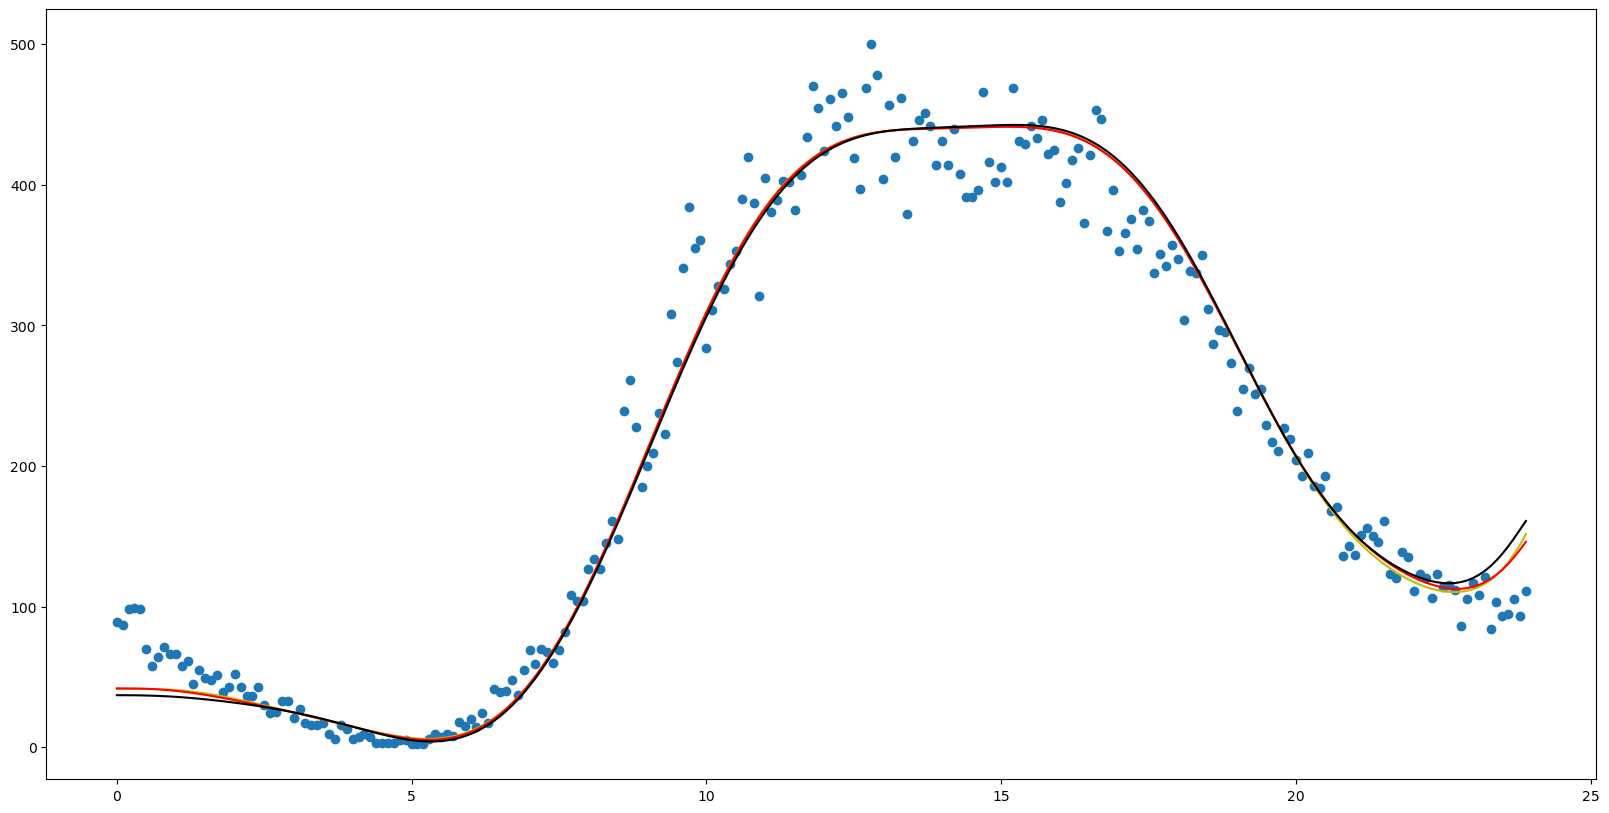

In [260]:
#Saturday
sat_ridge_1 = linear_model.Ridge(alpha=1).fit(x_15, sy).predict(x_15)
sat_ridge_10 = linear_model.Ridge(alpha=10).fit(x_15, sy).predict(x_15)
sat_ridge_50 = linear_model.Ridge(alpha=50).fit(x_15, sy).predict(x_15)
plt.scatter(x, sy)
plt.plot(x, sat_ridge_1, c = 'y')
plt.plot(x, sat_ridge_10, c = 'r')
plt.plot(x, sat_ridge_50, c = 'k')

## 4. Describe your results and which `n` and  $\alpha$ you find fits the data best to your models

For the Monday linear non-ridge model, n=5 performs poorly as it is so generalized and does not display the rush hour peaks witnessed in the underlying training data. The n=10 and n=15 models perform comparably, both display the monday rush hour peaks. The n=15 model is notably different than the n=10 model when examining the bike counts at the beginning of the day prior to the first rush hour peak, with notable curves whereas the n=15 model is smoothed. For the saturday linear, non-ridge model, the n=5 model performs the worst, predicting the low volume earlier in the morning than the underlying data shows, as well as predicting the high volume point of the day with a less steep slope and a later peak than the n=10 and n=15 models. For the saturday data, the n=10 model conforms highly to the training data points, connecting with a high number of points, whereas the n=15 model is more fluid, not in direct contact with as many underlying data points, and thus can be better generalized to predict bike volume.  

For the Monday linear ridge model, altering the alpha value to alpha=25 creates an extreme drop in predictions at the end of the day, a trend that is likely inplausible in real-world application. The alpha=1 and alpha=10 models perform comparably, however, as alpha increases, the slight decrease in volume near the end of the day is overpredicted with the alpha=10 model, likely not an applicable model for predicting bike volume. With more extreme changes in alpha for the saturday data, with models of alpha=1, alpha=10, and alpha=50, all perform nearly the same. The alpha=10 marginally may be a better model, as the slope at the beginning and end of the day is less steep than the alpha=1 and alpha=50 models. 